# Linear Regression
#### Implement a simple linear regression on dog age x veterinary visit count data

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.style.use('ggplot')

# Import points
df = pd.read_csv("https://bit.ly/3goOAnt", delimiter=",")
df.head()


,x,y
0,1,5
1,2,10
2,3,10
3,4,15
4,5,14


In [3]:
# Extract input variables (all rows, all columns but last column
X = df.values[:, :-1]
print(X)

# Extract output column (all rows, last column)
Y = df.values[:, -1]
print(Y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[ 5 10 10 15 14 15 19 18 25 23]


m = [1.93939394]
b = [4.73333333]


Text(0, 0.5, 'Visit Count')

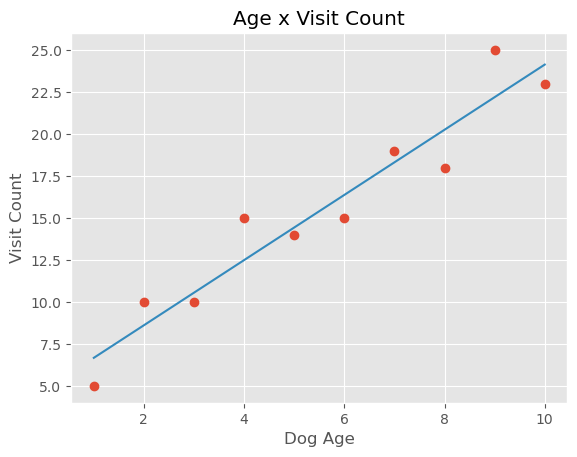

In [20]:
# Fit a line to the points
fit = LinearRegression().fit(X, Y)
# m, b
m = fit.coef_.flatten()
b = fit.intercept_.flatten()
print(f"m = {m}")
print(f"b = {b}")

plt.plot(X, Y, 'o') # scatterplot
plt.plot(X, m*X+b) # line
plt.title("Age x Visit Count")
plt.xlabel("Dog Age")
plt.ylabel("Visit Count")

#### Find the **residuals and squared errors** by hand

In [5]:
points = pd.read_csv("https://bit.ly/3goOAnt", delimiter=",").itertuples()

# test with a given line
m = 1.93939394
b = 4.73333333

# calculate the residuals
for p in points:
    yactual = p.y
    ypredict = m*p.x+b
    residual = yactual - ypredict
    print(residual)

-1.6727272699999993
1.3878787900000003
-0.5515151500000002
2.509090910000001
-0.43030303000000103
-1.3696969699999997
0.6909090900000017
-2.2484848500000005
2.812121210000001
-1.1272727300000014


#### Calculating the sum of squares for a given line and data

In [6]:
points = pd.read_csv("https://bit.ly/2KF29Bd").itertuples()

# test with a given line
m = 1.93939
b = 4.73333

sum_of_squares = 0.0

# calculate the squares
for p in points:
    yactual = p.y
    ypredict = m*p.x + b
    residual_squared = (ypredict - yactual)**2
    sum_of_squares += residual_squared

print(f"sum of squares: {sum_of_squares}")

sum of squares: 28.096969704500005


#### Finding the best line fit
There are a couple of search algorithms we can employ, which try to find the right set of values to solve a given problem. You can try a brute force approach, generating random m and b values millions of times and choosingthe ones that produce the least sum of squares. This will not work well because it will take an endless amount of time to find even a decent approximation. We will need something a little more guided. I will curate
five techniques you can use: *closed form, matrix inversion, matrix decomposition, gradient descent, and stochastic gradient descent*. There are
other search algorithms like *hill climbing* that could be used.

* **Close Form Equation**

Some readers may ask if there is a formula (called a closed form equation)
to fit a linear regression by exact calculation. The answer is yes, but only
for a simple linear regression with one input variable. This luxury does not
exist for many machine learning problems with several input variables and
a large amount of data. We can use linear algebra techniques to scale up,
and we will talk about this shortly. We will also take the opportunity to
learn about search algorithms like stochastic gradient descent.
For a simple linear regression with only one input and one output variable,
here are the closed form equations to calculate m and b.

$$
m = \frac{n \sum xy - \sum x \sum y}{n \sum x^2 - \big( \sum x)^2} \\[10pt]
b = \frac{\sum y}{n} -m \frac{\sum x}{n}
$$

In [18]:
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())
n = len(points)

m = (n * sum(p.x * p.y for p in points) - sum(p.x for p in points) * sum(p.y for p in points)) / (n*sum(p.x**2 for p in points)
    - sum(p.x for p in points)**2)

b = (sum(p.y for p in points) / n) - m * sum(p.x for p in points) / n

print(m, b)

1.9393939393939394 4.7333333333333325
